In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('data_4_ScienceHack2021/trip_1/wifi_data.csv', sep=';')
data

,id,arr_ts,epoch_ts,vendor,frame_nr,subtype,mac_address,rssi,seq_num,ht_capabilities,ht_ampdu,tag_nr,tag_length,tag_mcs,tag_HTex,tag_TXbf,tag_Antsel
0,1,"Apr 12, 2021 11:22:24.116167186 CEST",1.618219e+09,nil,1,4,d6:26:b4:b7:b0:93,-57,2030,0x0000016f,0x00000013,0,0,(none),0x00000000,0x00000000,0x00000000
1,2,"Apr 12, 2021 11:22:24.177903513 CEST",1.618219e+09,nil,2,4,d6:26:b4:b7:b0:93,-59,2031,0x0000016f,0x00000013,0,0,(none),0x00000000,0x00000000,0x00000000
2,3,"Apr 12, 2021 11:22:28.776136091 CEST",1.618219e+09,nil,3,4,92:6a:96:38:22:e7,-43,2083,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
3,4,"Apr 12, 2021 11:22:28.792671135 CEST",1.618219e+09,nil,4,4,92:6a:96:38:22:e7,-43,2084,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
4,5,"Apr 12, 2021 11:22:30.466902764 CEST",1.618219e+09,nil,8,4,ec:10:7b:6b:21:fc,-35,1447,0x0000016e,0x00000003,0,0,(none),0x00000000,0x00000000,0x00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,9586,"Apr 12, 2021 12:17:38.449978856 CEST",1.618223e+09,nil,11016,4,a2:55:58:08:03:fa,-43,3253,0x0000402d,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9586,9587,"Apr 12, 2021 12:17:38.685731267 CEST",1.618223e+09,nil,11017,4,8e:f0:97:5f:20:a8,-69,545,0x000011ef,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9587,9588,"Apr 12, 2021 12:17:38.886854416 CEST",1.618223e+09,nil,11018,4,0a:17:49:42:9a:c3,-49,2910,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9588,9589,"Apr 12, 2021 12:17:38.929599434 CEST",1.618223e+09,nil,11019,4,0a:17:49:42:9a:c3,-51,2911,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000


In [13]:
sum(data["mac_address"].str[1] == "2") + sum(data["mac_address"].str[1] == "6") + sum(data["mac_address"].str[1] == "a") + sum(data["mac_address"].str[1] == "e")

5064

In [37]:
len(set(data["mac_address"]))

3627

<AxesSubplot:>

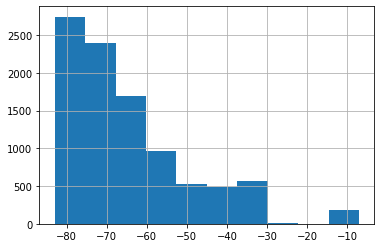

In [28]:
data["rssi"].hist()

In [78]:
gt = pd.read_csv("data_4_ScienceHack2021/trip_1/passenger_count_nums")
gt = gt.drop(gt.index[0])
gt

,Epoch_Time,Number_of_Passengers
1,1618219347.84,-10.0
2,1618219353.9,12.0
3,1618219367.0,-99.0
4,1618219383.0,-10.0
5,1618219394.57,14.0
...,...,...
92,1618222386.94,13.0
93,1618222546.0,-99.0
94,1618222559.0,-10.0
95,1618222585.93,13.0


In [79]:
start = 1618219347.84
stop = 1618219367.0
print(len(gt["Epoch_Time"] == -10))
print(len(gt["Epoch_Time"] == -99))

96
96


In [85]:
starts = gt[gt["Number_of_Passengers"] == -10]["Epoch_Time"]
stops = gt[gt["Number_of_Passengers"] == -99]["Epoch_Time"]
gt_numbers = gt[(gt["Number_of_Passengers"] != -10) & (gt["Number_of_Passengers"] != -99)]["Number_of_Passengers"]
# len(data[(data["epoch_ts"] > start) & (data["epoch_ts"] < stop)])

In [87]:
data["epoch_ts"]

0       1.618219e+09
1       1.618219e+09
2       1.618219e+09
3       1.618219e+09
4       1.618219e+09
            ...     
9585    1.618223e+09
9586    1.618223e+09
9587    1.618223e+09
9588    1.618223e+09
9589    1.618223e+09
Name: epoch_ts, Length: 9590, dtype: float64

16 12.0
124 14.0
136 18.0
130 17.0
170 10.0
145 11.0
105 7.0
259 8.0
155 10.0
472 15.0
171 13.0
241 12.0
216 12.0
244 16.0
217 18.0
574 10.0
196 13.0
250 12.0
172 12.0
277 14.0
234 18.0
304 16.0
873 13.0
296 9.0
326 17.0
407 14.0
320 15.0
79 16.0
51 14.0
106 15.0
341 13.0
349 13.0


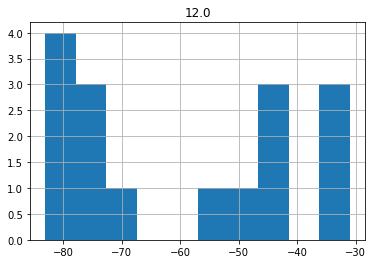

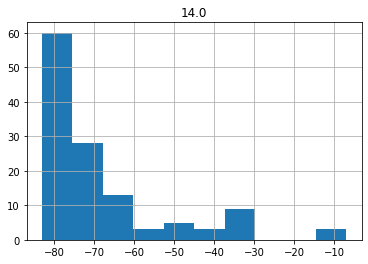

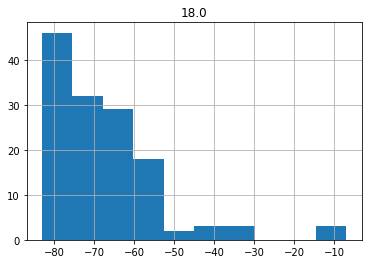

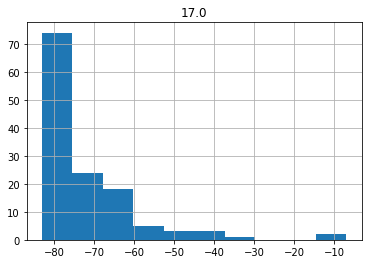

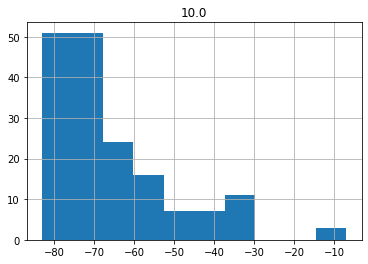

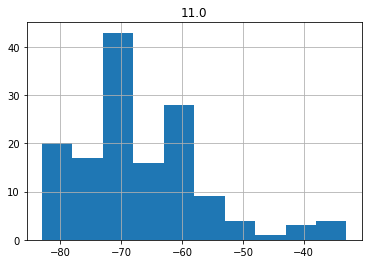

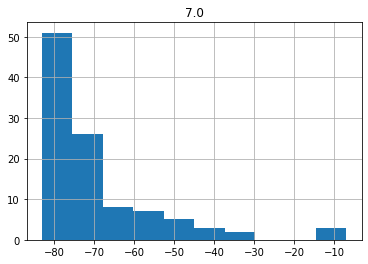

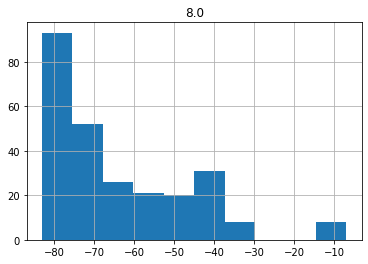

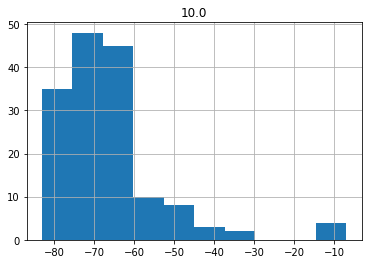

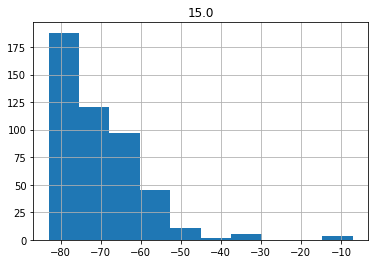

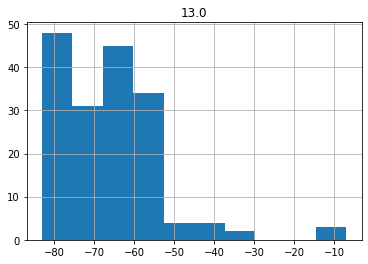

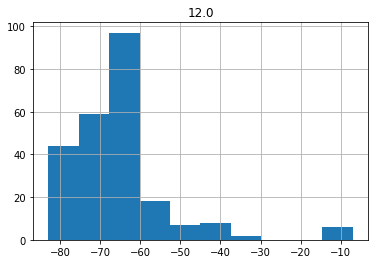

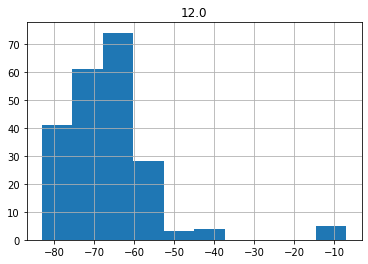

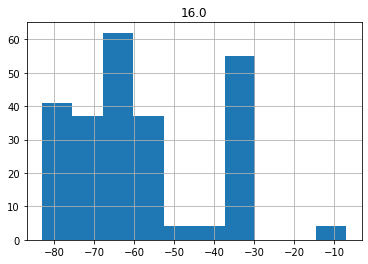

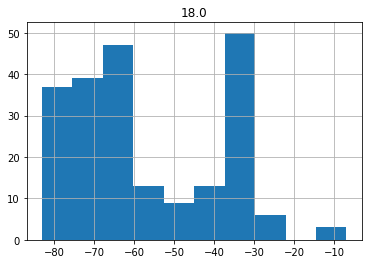

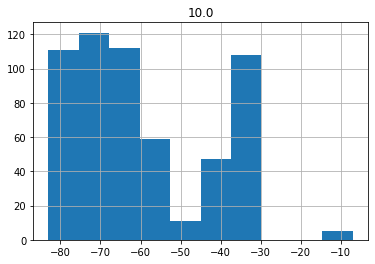

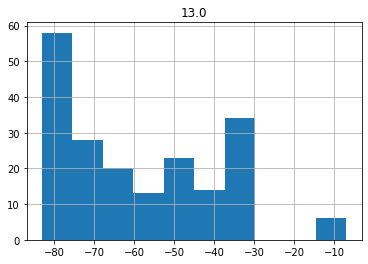

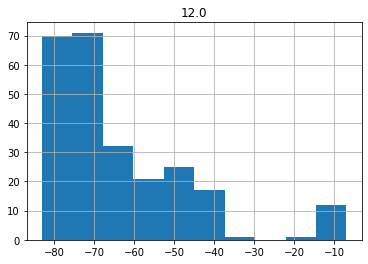

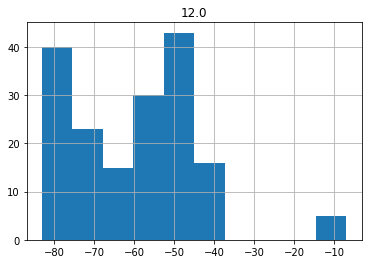

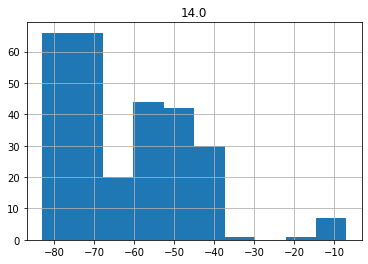

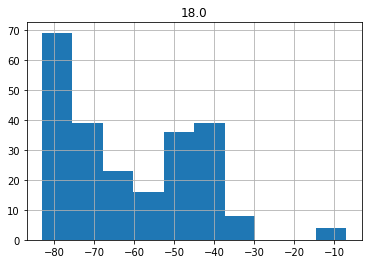

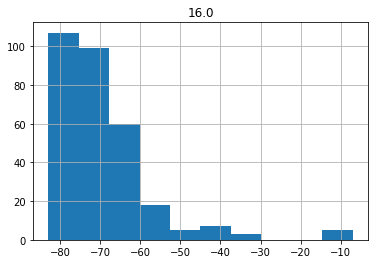

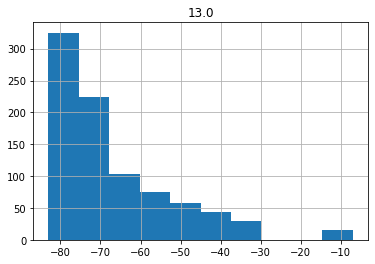

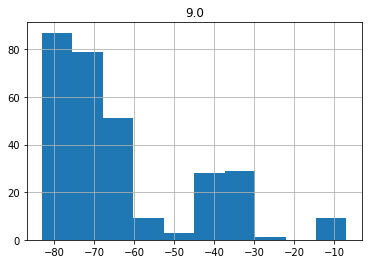

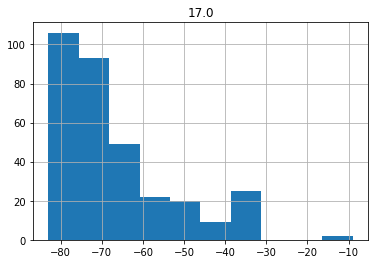

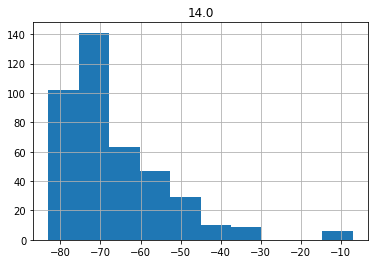

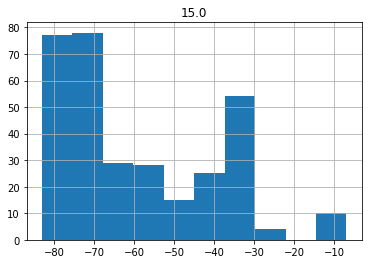

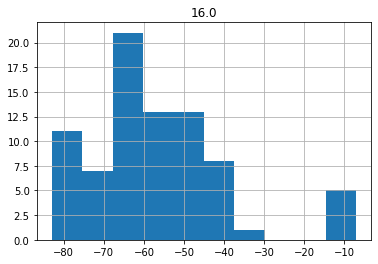

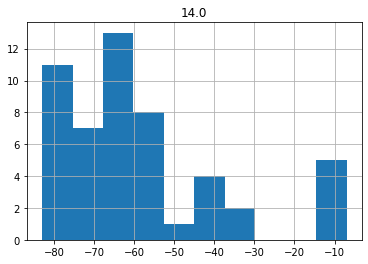

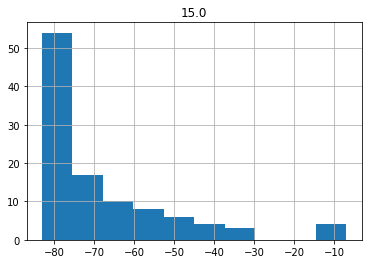

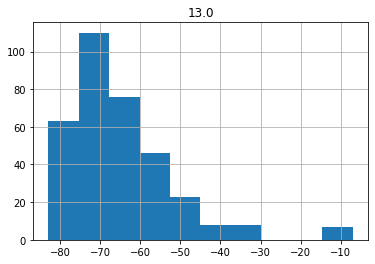

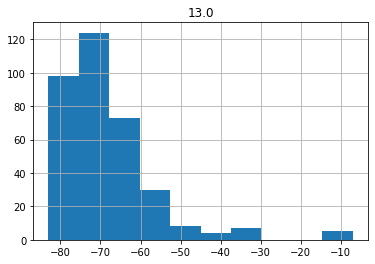

In [98]:
for start, stop, number in zip(starts, stops, gt_numbers):
    conn = data[(data["epoch_ts"] > float(start)) & (data["epoch_ts"] < float(stop))]
    print(len(conn), number)
    plt.figure()
    plt.title(number)
    conn["rssi"].hist()

In [95]:
conn

,id,arr_ts,epoch_ts,vendor,frame_nr,subtype,mac_address,rssi,seq_num,ht_capabilities,ht_ampdu,tag_nr,tag_length,tag_mcs,tag_HTex,tag_TXbf,tag_Antsel
9193,9194,"Apr 12, 2021 12:15:59.308372175 CEST",1.618223e+09,nil,10486,4,0e:f0:2b:07:76:8e,-53,1799,0x0000002d,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9194,9195,"Apr 12, 2021 12:15:59.685280204 CEST",1.618223e+09,nil,10487,4,02:00:00:00:00:00,-65,689,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9195,9196,"Apr 12, 2021 12:15:59.763404647 CEST",1.618223e+09,nil,10488,4,02:00:00:00:00:00,-65,691,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9196,9197,"Apr 12, 2021 12:15:59.931965481 CEST",1.618223e+09,nil,10489,4,74:95:ec:0b:e4:8c,-71,1084,0x00000130,0x0000001c,0,21,(none),0x00000400,0x00000000,0x00000033
9197,9198,"Apr 12, 2021 12:15:59.943704619 CEST",1.618223e+09,nil,10490,4,74:95:ec:0b:e4:8c,-63,1085,0x00000130,0x0000001c,0,21,(none),0x00000400,0x00000000,0x00000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,9538,"Apr 12, 2021 12:17:27.876034132 CEST",1.618223e+09,nil,10955,4,e2:2c:ee:d1:8d:96,-59,2770,0x0000402d,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9538,9539,"Apr 12, 2021 12:17:28.057735536 CEST",1.618223e+09,nil,10956,4,ae:32:06:24:e3:1a,-61,224,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9539,9540,"Apr 12, 2021 12:17:28.077959430 CEST",1.618223e+09,nil,10957,4,ae:32:06:24:e3:1a,-69,226,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9540,9541,"Apr 12, 2021 12:17:28.553671774 CEST",1.618223e+09,nil,10958,4,22:31:fe:62:63:3e,-59,3204,0x0000402d,0x00000017,0,17,(none),0x00000000,0x00000000,0x00000000


In [100]:
set(data["tag_nr"])

{0}